# Nadia Richer

---

## Research Question

How does the number of children an individual has influence their insurance charges?

### Context
I plan to examine the relationship between number of children and insurance charges. I want to do this by analyzing this relationship in a general context, as well as combined with other variables like age and gender. I am interested in whether insurance charges based on children are similar in men and women, or if there are identifiable differences. I am also curious about how insurance charges differ between age groups, based on number of children.


### Rough Analysis Plan
1. Identifying research question and key variables
- Key variables will include number of children, age, gender, and insurance charges. Identifying these will allow me to clean the data effectively. 
2. Data cleaning
- Remove any NaN values from the dataset.
- Remove any irrelevant data or outliers. 
- Drop columns that are irrelevant to my analysis.
    - Including BMI, smoker, and region 
3. Shaping data by adding new columns, calculations, etc.
- Calculations may include:
    - Percentage of male vs. female with 1 child, 2 children, 3 children, etc.
    - Percentage of 10 year-age increments with 1 child, 2 children, 3 children, etc.
- New columns may include:
    - Number of children by gender
    - Number of children by age increments
4. Exploring different plots to visualize my data and relationships
- I will use the Seaborn tutorial and experience from Lab 5 to start thinking about how I can effectively answer my research question through the use of plots.

---
# Exploratory Data Analysis (Milestone 3)

### Task 1: Conduct an EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/raw/insurance.csv")
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'Insurance Charges')

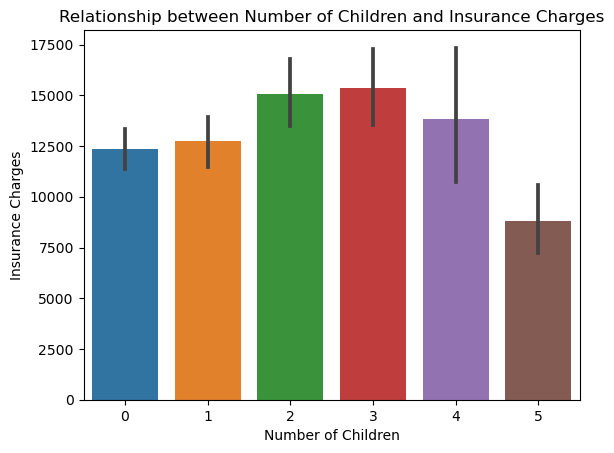

In [ ]:
bplot = sns.barplot(data=df,y="charges",x="children")
bplot.set_title("Relationship between Number of Children and Insurance Charges")
bplot.set_xlabel("Number of Children")
bplot.set_ylabel("Insurance Charges")

#### Observations
- People with 0 children do not have the lowest charges.
    - This contradicts my personal understanding. I would think that those individuals with no children would have the lowest charges. There must be some mediating factors here. 
- There is only a very slight increase in charges when an individual has 1 child versus no children. 
- There is a sharp increase in charges when an individual has another child (2 children).
- After 3 children, charges begin to decline.
    - This contradicts my personal understanding. I would think that insurance charges continue increasing with the number of children. There must be some mediating factors here. 

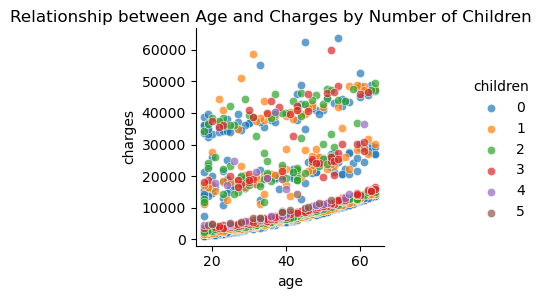

In [ ]:
fgrid = sns.FacetGrid(data=df, hue="children")
fgrid.map(sns.scatterplot, "age" ,"charges", alpha=.7)
fgrid.add_legend()
fgrid.fig.suptitle("Relationship between Age and Charges by Number of Children")
fgrid.fig.subplots_adjust(top=0.92)

#### Observations
- When considering age, more linear relationships begin to appear. 
- Age appears to be a more relevant indicator of higher charges than number of children. 
- Number of children appears to be randomly scattered, and does not seem to be an indicator of any solid relationship with increased charges. 

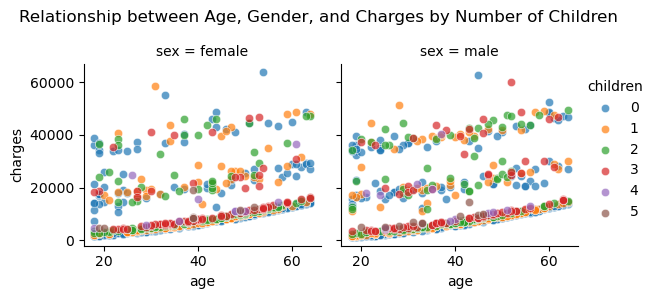

In [ ]:
fgrid_sex = sns.FacetGrid(data=df, col="sex", hue="children")
fgrid_sex.map(sns.scatterplot, "age" ,"charges", alpha=.7)
fgrid_sex.add_legend()
fgrid_sex.fig.suptitle("Relationship between Age, Gender, and Charges by Number of Children")
fgrid_sex.fig.subplots_adjust(top=0.80)

#### Observations
- This scatterplot is a replication of the plot above, but now separated by sex to see if there are any differences.
- There does not appear to be any notable differences between sexes in this relationship.
    - Females and males have consistent charges in relation to their age and number of children.
- After considering sex, age remains the most relevant indicator of higher charges.

### Task 2: Refine your Research Question

After doing an EDA, I believe my research question is still viable. However, in my original research question context, I stated that I would likely only consider age and sex, and drop the other columns. After doing a bit of EDA, I realized this would not give my research question enough breadth for an entire project.

While I don't think I will change my research question at this point, I will amend my rough analysis plan. The dataset we chose is already very clean, and I think I will consider all columns including age, sex, smoker, region, and BMI. 

## Changes to Analysis Plan
1. Identifying research question and key variables
- Key variables will include number of children, age, gender, and insurance charges. Identifying these will allow me to clean the data effectively. 
2. Data cleaning
- Remove any NaN values from the dataset. 
- Remove any irrelevant data or outliers. 
- Drop any columns irrelevant to my analysis. 
    - **Will no longer be dropping smoker, region, and BMI columns as my research context needs more breadth.**
3. Shaping data by adding new columns, calculations, etc.
- Calculations may include:
    - Percentage of male vs. female with 1 child, 2 children, 3 children, etc.
    - Percentage of 10 year-age increments with 1 child, 2 children, 3 children, etc.
- New columns may include:
    - Number of children by gender
    - Number of children by age increments 
4. Exploring different plots to visualize my data and relationships
- I will use the Seaborn tutorial and experience from Lab 5 to start thinking about how I can effectively answer my research question through the use of plots.
- **Use of FacetGrids to plot multiple variables on the same grids.**

---
# Visualizations, Analysis, and Pipeline (Milestone 4)

### Task 1: Set up an Analysis Pipeline

#### 1.1 Load Data

In [ ]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


#### 1.2 Clean Data

In [ ]:
df.dropna(subset = ["age","sex","bmi","children","smoker","region","charges"])
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


The dataset appears to be very clean, and did not have any NaN values in any columns. 

#### 1.3 Process Data

In [ ]:
#df["charge per child"]=(df["charges"]/df["children"])
df
# inf values indicate charges do not relate to number of children

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


#### 1.4 Wrangle Data

Restructuring the dataset is not necessary as it is very clean and well-organized.

#### Gaining a deeper understanding of the data

In [ ]:
df["charges"].mean()

13270.422265141257

In [ ]:
df["charges"].max()

63770.42801

In [ ]:
df["charges"].min()

1121.8739

In [ ]:
df.groupby(["sex","children"]).count()

index  age  bmi  smoker  region  charges
sex    children                                          
female 0           289  289  289     289     289      289
       1           158  158  158     158     158      158
       2           119  119  119     119     119      119
       3            77   77   77      77      77       77
       4            11   11   11      11      11       11
       5             8    8    8       8       8        8
male   0           285  285  285     285     285      285
       1           166  166  166     166     166      166
       2           121  121  121     121     121      121
       3            80   80   80      80      80       80
       4            14   14   14      14      14       14
       5            10   10   10      10      10       10

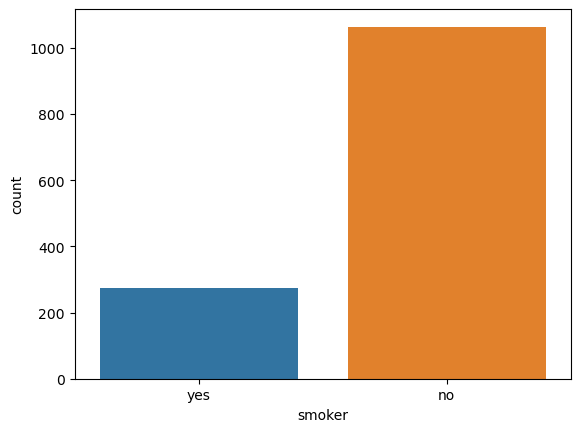

In [ ]:
smoker_count=sns.countplot(data=df,x='smoker')

### Task 2: Method Chaining

#### 2.1 Build and test the method chain

In [ ]:
import pandas as pd
import numpy as np
data=df

In [ ]:
cleandf = (   
    df
    .drop_duplicates()
    .dropna(subset = ["age","sex","bmi","children","smoker","region","charges"])
    .reset_index(drop=True)
    #.drop(df[df["children"]<1].index)
    # drop rows of individuals with no children
    .assign(charge_per_child= (lambda x: x['charges'] / x['children'])).sort_values("charges",ascending=True).reset_index(drop=True)
    # sorted by lowest charges
    .rename(columns={"children":"number_of_children"})
)
cleandf

,index,age,sex,bmi,number_of_children,smoker,region,charges,charge_per_child
0,940,18,male,23.210,0,no,southeast,1121.87390,inf
1,808,18,male,30.140,0,no,southeast,1131.50660,inf
2,1244,18,male,33.330,0,no,southeast,1135.94070,inf
3,663,18,male,33.660,0,no,southeast,1136.39940,inf
4,22,18,male,34.100,0,no,southeast,1137.01100,inf
...,...,...,...,...,...,...,...,...,...
1333,819,33,female,35.530,0,yes,northwest,55135.40209,inf
1334,577,31,female,38.095,1,yes,northeast,58571.07448,58571.07448
1335,1230,52,male,34.485,3,yes,northwest,60021.39897,20007.13299
1336,1300,45,male,30.360,0,yes,southeast,62592.87309,inf


#### 2.3 Wrap your method chain in a function

In [ ]:
def load_and_process(path="../data/raw/insurance.csv"):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv("../data/raw/insurance.csv")
        .drop_duplicates()
    )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .rename(columns={"children":"number_of_children"})
        .assign(charge_per_child= (lambda x: x['charges'] / x['number_of_children'])).sort_values("charges",ascending=True).reset_index(drop=True)
        .reset_index(drop=True)
      )
    df3=(
        df2
        .drop(df2[df2["number_of_children"]<1].index)
        .dropna(subset = ["age","sex","bmi","number_of_children","smoker","region","charges"])
        .reset_index(drop=True)
    )
        
    
                     

    # Make sure to return the latest dataframe

    return df3 


In [ ]:
load_and_process("../data/raw/insurance.csv")

,index,age,sex,bmi,number_of_children,smoker,region,charges,charge_per_child
0,1023,18,male,23.320,1,no,southeast,1711.02680,1711.02680
1,270,18,male,29.370,1,no,southeast,1719.43630,1719.43630
2,1283,18,male,30.030,1,no,southeast,1720.35370,1720.35370
3,1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
4,710,18,male,35.200,1,no,southeast,1727.54000,1727.54000
...,...,...,...,...,...,...,...,...,...
759,1062,59,male,41.140,1,yes,southeast,48970.24760,48970.24760
760,1241,64,male,36.960,2,yes,southeast,49577.66240,24788.83120
761,34,28,male,36.400,1,yes,southwest,51194.55914,51194.55914
762,577,31,female,38.095,1,yes,northeast,58571.07448,58571.07448


#### 3.3 Move your function to a .py file

In [ ]:
import code

In [ ]:
from scripts import project_functions3 as pt

In [ ]:
pt.load_and_process("../data/raw/insurance.csv")

,index,age,sex,bmi,number_of_children,smoker,region,charges,charge_per_child
0,1023,18,male,23.320,1,no,southeast,1711.02680,1711.02680
1,270,18,male,29.370,1,no,southeast,1719.43630,1719.43630
2,1283,18,male,30.030,1,no,southeast,1720.35370,1720.35370
3,1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
4,710,18,male,35.200,1,no,southeast,1727.54000,1727.54000
...,...,...,...,...,...,...,...,...,...
759,1062,59,male,41.140,1,yes,southeast,48970.24760,48970.24760
760,1241,64,male,36.960,2,yes,southeast,49577.66240,24788.83120
761,34,28,male,36.400,1,yes,southwest,51194.55914,51194.55914
762,577,31,female,38.095,1,yes,northeast,58571.07448,58571.07448


### Task 3: Conduct your Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')

analysis_df=cleandf #df from method chaining

#### **Research question**: How does the number of children an individual has influence their insurance charges?

To answer my research question, I will complete the following:
1. Analyze the basic relationship between number of children and charges.
1. Analyze the relationship, considering sex.
1. Analyze the relationship, considering BMI.
1. Analyze the relationship, considering smoker status.
1. Analyze the relationship, considering age.

By analyzing these points, I will be able to identify how number of children influences charges related to other variables, and determine whether number of children is a significant variable in determining insurance charges. 

#### Analyze the basic relationship between number of children and charges.

Text(0, 0.5, 'Insurance Charges')

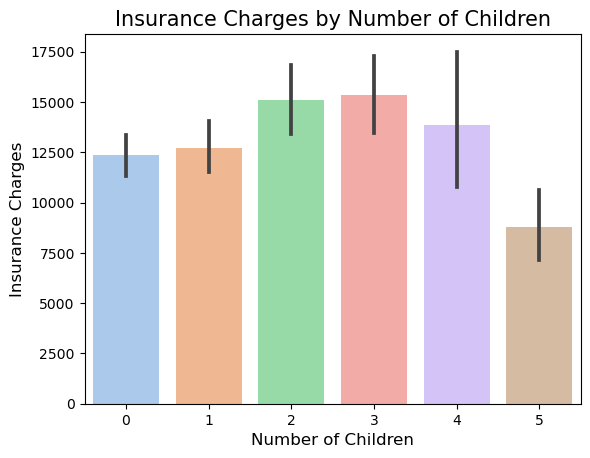

In [ ]:
barplot=sns.barplot(data=analysis_df, y='charges', x='number_of_children')
plt.title('Insurance Charges by Number of Children',fontsize=15)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

**Analysis:** This barplot represents the basic relationship between insurance charges and number of children. As we can see from this graph, individuals with 3 children have the highest insurance charges, closely followed by those with 2 children. 

Notes from my EDA:
- Individuals with 0 children do not have the lowest charges.
- There is little change in insurance charges from 0 children to 1 child. 
- There is a sharp increase in insurance charges in indviduals with 3 children compared to 2 children. 
- Individuals with 5 children have the lowest charges of any of the groups. 

Since completing my EDA, I have identified a few mediating factors that can help gain a deeper understanding of why an increase in number of children does not cause a proportional increase in insurance charges. 

Mediating factors may include:
- The data is skewed by the number of individuals with a certain number of children. 
    - i.e., it is probably much more common to have 1 or 2 children than 5 children.
- Other factors such as sex, BMI, smoker status, and age are more closely tied with insurance charges than number of children are. 
- Number of children is used as a descriptor for background information rather than as an important variable in determining charges. 

To conclude on these mediating factors, I will analyze this relationship between insurance charges and number of children considering the other values available in the dataset.

### Analyze the relationship, considering sex.

Text(46.37594444444443, 0.5, 'Insurance Charges')

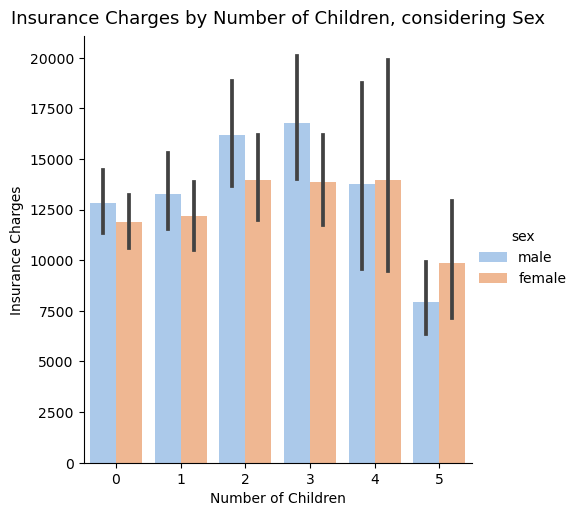

In [ ]:
sex_plot=sns.catplot(
    data=analysis_df,
    x='number_of_children',
    y='charges',
    hue='sex',
    kind='bar'
)
plt.title('Insurance Charges by Number of Children, considering Sex',fontsize=13,y=1.01)
plt.xlabel('Number of Children',fontsize=10)
plt.ylabel('Insurance Charges',fontsize=10)

**Caption:** This catplot represents the relationship between the number of children (x) and insurance charges (y), considering sex. Using the hue function on the catplot allows us to see how sex relates to charges by number of children. 

**Analysis:** At first glance, we can see that males are probably more likely to have higher insurance charges than females, regardless of the number of children. However, females with 5 children have higher insurance charges than males with 5 children. This could be due to the fact that there are simply more females with 5 children than males with 5 children in the dataset, skewing the data. As most of the other data shows generally higher charges for males, I believe we can assume that males have higher insurance charges overall. I will double check this assumption by using a simple plot to compare insurance charges for males and females.

Text(0, 0.5, 'Insurance Charges')

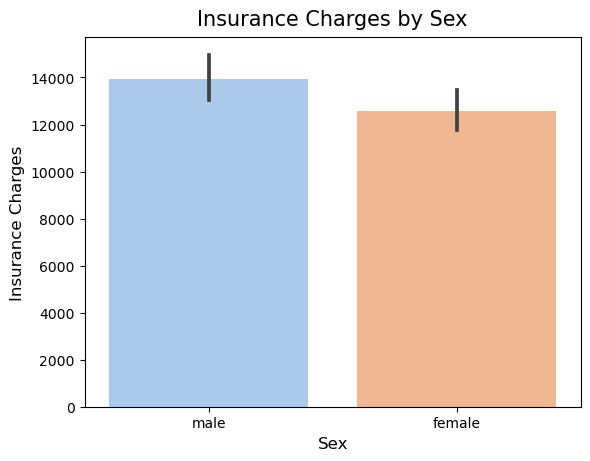

In [ ]:
sex2_plot=sns.barplot(
    data=analysis_df,
    y='charges',
    x='sex',
)
plt.title('Insurance Charges by Sex',fontsize=15,y=1.01)
plt.xlabel('Sex',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

**Caption:** This basic barplot represents the relationship between sex (x) and insurance charges (y).

**Analysis:** I think it is safe to assume sex is more indicative of higher insurance charges than number of children. On average, males with any number of children will have higher insurance charges than females with the same number of children. 

**Key Takeaway:** Sex is likely a more reliable indicator of higher insurance charges than number of children. 

### Analyze the relationship, considering BMI.

<matplotlib.legend.Legend>

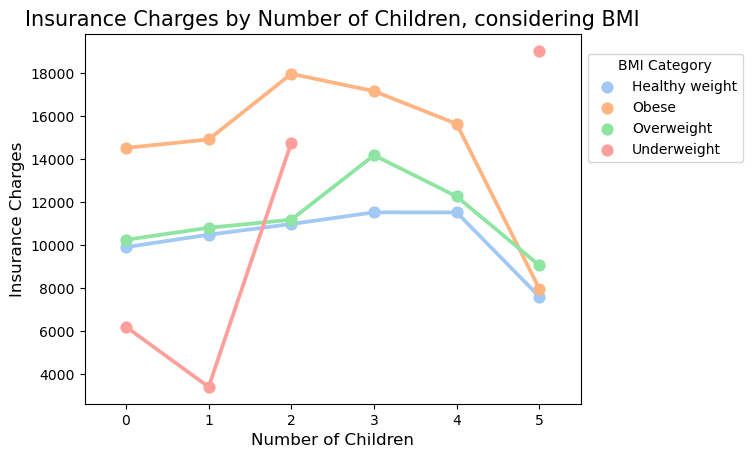

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
analysis_df['bmi_category']=analysis_df['bmi'].apply(bmi_category)

bmi_plot=sns.pointplot(
    data=analysis_df,
    x='number_of_children',
    y='charges',
    hue='bmi_category',
    errorbar=None
)
plt.title('Insurance Charges by Number of Children, considering BMI',fontsize=15)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)
bmi_plot.legend(loc='center left', bbox_to_anchor=(1,0.8),title='BMI Category')

**Caption:** This pointplot represents the relationship between the number of children (x) and insurance charges (y), considering BMI. Using the hue function on the pointplot allows us to see the differences between BMI categories and how they relate to charges by number of children. 

**Analysis:** At first glance, we can see that obese individuals have the highest insurance charges, regardless of the number of children. Overweight individuals have the next highest insurance charges, closely followed by healthy weight individuals. The data for underweight individuals appears to be skewed, likely due to the fact that there are not many underweight individuals in society (only 3-5% of the population (World Health Organization, n.d.)), so they are likely under-represented in this dataset. Additionally, we can see the same pattern of charges declining for individuals with 5 children, again likely due to the under-representation within the dataset. Based on this pointplot, we can draw the assumption that since obese individuals have the highest charges, that BMI is more indicative of insurance charges than number of children. I will verify this assumption with a simple barplot to compare insurance charges by BMI category. 

*World Health Organization. (n.d.) Adults aged ≥ 15 years who are underweight (%). Retrieved March 24, 2023 from https://www.who.int/data/gho/indicator-metadata-registry/imr-details/370#:~:text=About%203%2D5%25%20of%20a,have%20a%20BMI%20below%2018.5.* 

Text(0, 0.5, 'Insurance Charges')

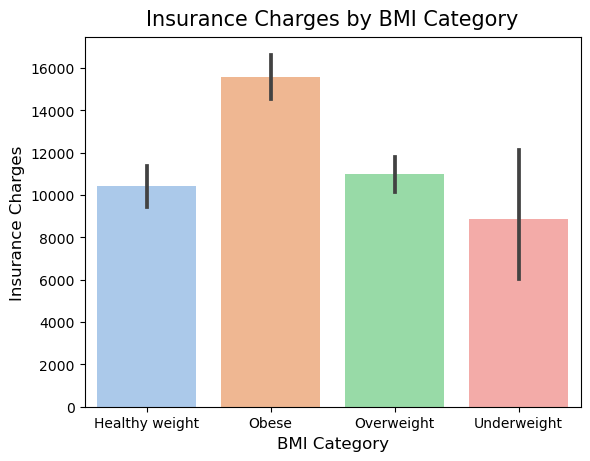

In [ ]:
bmi2_plot=sns.barplot(
    data=analysis_df,
    y='charges',
    x='bmi_category',
)
plt.title('Insurance Charges by BMI Category',fontsize=15,y=1.01)
plt.xlabel('BMI Category',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

**Caption:** This simple barplot represents the relationship between BMI category (x) and insurance charges (y). 

**Analysis:** I think it is safe to assume that BMI category is more indicative of higher insurance charges than number of children. On average, obese individuals with any number of children will pay higher insurance charges than healthy or overweight individuals with the same number of children. 

**Key Takeaway:** BMI is likely a more reliable indicator of higher insurance charges than number of children. 

### Analyze the relationship, considering smoker status.

<matplotlib.legend.Legend>

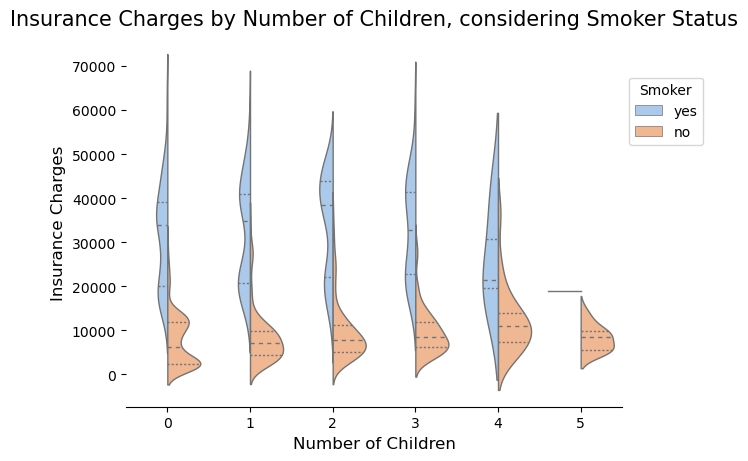

In [ ]:
smoker_plot=sns.violinplot(
    data=df,
    x='children',
    y='charges',
    hue='smoker',
    linewidth=1,
    split=True,
    inner='quart',
)
sns.despine(left=True)
plt.title('Insurance Charges by Number of Children, considering Smoker Status',fontsize=15,y=1.01)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)
smoker_plot.legend(loc='center left', bbox_to_anchor=(1,0.8),title='Smoker')

**Caption:** This violinplot represents the relationship between the number of children (x) and insurance charges (y), considering smoker status. Using the hue function on the violinplot allows us to see the differences between smoker status and how they relate to charges by number of children. 

**Analysis:** At first glance, we can see that smokers will have higher insurance charges than non-smokers, regardless of the number of children they have. The range of charges for smokers is much higher than for non-smokers. This suggests that smoker status is more indicative of higher charges than number of children. To verify this assumption, I will use a boxplot to compare insurance charges to smoker status without considering number of children.

Text(0, 0.5, 'Insurance Charges')

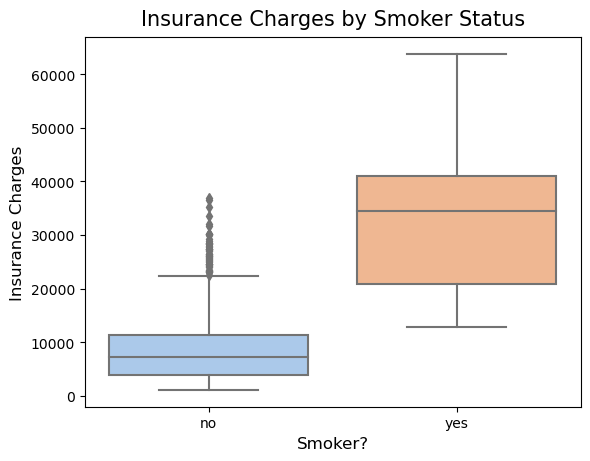

In [ ]:
smoker2_plot=sns.boxplot(
    data=analysis_df,
    y='charges',
    x='smoker'
)
plt.title('Insurance Charges by Smoker Status',fontsize=15,y=1.01)
plt.xlabel('Smoker?',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

**Caption:** This boxplot represents the relationship between smoker status (x) and insurance charges (y). 

**Analysis:** I think it is safe to assume that smoker status is more indicative of higher insurance charges than number of children. On average, smokers with any number of children will pay higher insurance charges than non-smokers with the same number of children. 

**Key Takeaway:** Smoker status is likely a more reliable indicator of higher insurance charges than number of children.

### Analyze the relationship, considering age. 

In [ ]:
df['age'].min()

18

In [ ]:
df['age'].max()

64

<matplotlib.legend.Legend>

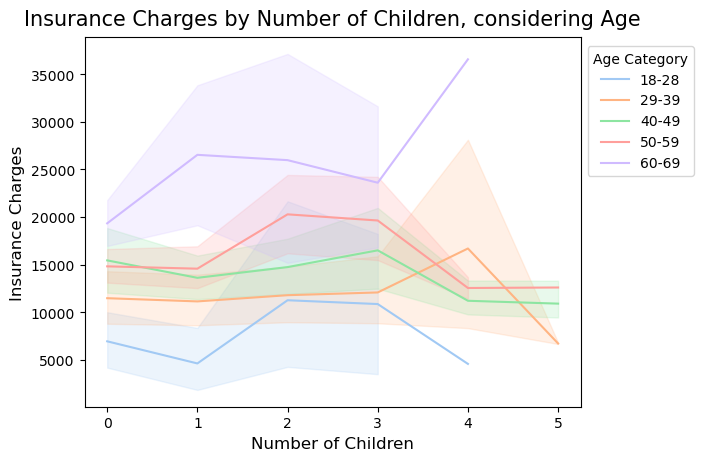

In [ ]:
def age_category(age):
    if age <= 18 < 28:
        return '18-28'
    elif 29 <= age < 39:
        return '29-39'
    elif 40 <= age < 49:
        return '40-49'
    elif 50 <= age < 59:
        return '50-59'
    elif 60 <= age < 69:
        return '60-69'
analysis_df['age_category']=analysis_df['age'].apply(age_category)


age_plot=sns.lineplot(
    data=analysis_df.sort_values(by='age_category'),
    x='number_of_children',
    y='charges',
    hue='age_category'

)
plt.title('Insurance Charges by Number of Children, considering Age',fontsize=15,y=1.01)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)
age_plot.legend(loc='center left', bbox_to_anchor=(1,0.8),title='Age Category')

**Caption:** This lineplot represents the relationship between the number of children (x) and insurance charges (y), considering age. Using the hue function on the violinplot allows us to see the differences between age categories and how they relate to charges by number of children. 

**Analysis:** At first glance, we can see a general trend that there is a positive correlation between age and insurance charges. From this graph we can assume that, generally, the younger a person is, the lower their insurance charges will be. This relationship appears regardless of the number of children an individual has. To verify this assumption, I will use a simple barplot to compare age categories to insurance charges. 

Text(0, 0.5, 'Insurance Charges')

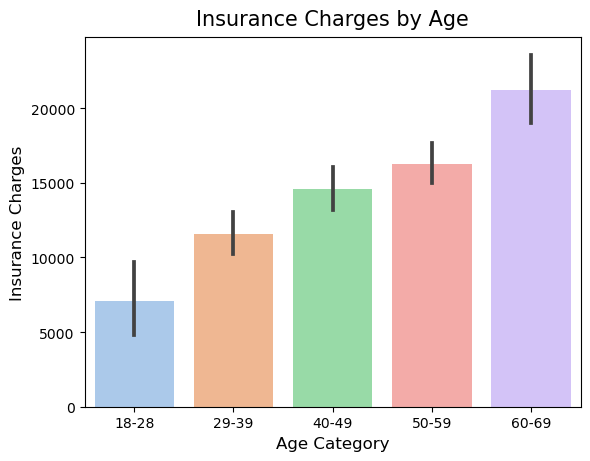

In [ ]:
smoker2_plot=sns.barplot(
    data=analysis_df,
    y='charges',
    x='age_category',
)
plt.title('Insurance Charges by Age',fontsize=15,y=1.01)
plt.xlabel('Age Category',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

**Caption:** This simple barplot represents the relationship between age category (x) and insurance charges (y). 

**Analysis:** I think it is safe to assume that age is more indicative of higher insurance charges than number of children. There is a positive correlation between age and insurance charges. 

**Key Takeaway:** Age is a more reliable indicator of higher insurance charges than number of children. 

---

### Analysis Conclusion

Number of children is likely more of a descriptive variable than a determining variable in determining insurance charges. None of the relationships between charges, number of children, and other variables indicate that number of children is a strong determining factor. Age, BMI, smoker status, and gender all seem to be more reliable predictors of insurance charges. 

**The answer to my research question:** Number of children does not seem to influence insurance charges in any detectable or significant way. I was not able to draw any significant conclusions on this topic.

Although I am disappointed there were no clear links between the data and my research question, I am able to conclude on the following indicators of higher insurance charges:

1. **Age:** Age appears to have the strongest linear relationship with an increase in insurance charges. Logically, this makes sense; the longer you are on a life insurance policy, the more you will pay. The older you are, the riskier it is to insure you. 
2. **Smoker Status:** The relationship between smokers and higher insurance charges is undeniable. On average, smokers will pay much more for insurance policies than non-smokers. This is logical as well; cigarettes can increase your risk of heart disease, high blood pressure, and many types of cancers. 
3. **BMI:** There appears to be a linear relationship between BMI and insurance charges. Those considered obese are at a higher risk for a multitude of health defects, which increases risk. This is also a logical and expected conclusion.
4. **Gender:** Lastly, differences in average insurance charges seem to arise between the two sexes. Males see slightly higher insurance charges than females. This is likely due to a variety of social factors. Although this slight relationship is present, it does not appear to be a strong deciding factor when compared to age, smoker status, and BMI. 

Overall, this analysis can assist individuals in identifying personal factors that increase insurance charges. 